In [ ]:
import numpy as num
import sage.all as sagemath

from matplotlib.pyplot import *
from numericalMethods import *
#style.use('Solarize_Light2') # 'Solarize_Light2'
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

x = sagemath.var("x")

def plotPoints(pointList, *args):
   # Matplotlib plot les points gràce à deux liste des coordonées en x et en y resp.
   xList = [point[0] for point in pointList]
   yList = [point[1] for point in pointList]
   plot(xList, yList, *args)
def plotFunction(function, xrange, **kwargs):
   t = num.arange(xrange[0], xrange[1], 0.1)

   # Si la fonction est symbolique, la cast en fonction rapidement évaluable sur le nparray
   if type(function) == sagemath.sage.symbolic.expression.Expression:
      plot(t, sagemath.fast_callable(function, vars=[x])(t), **kwargs)   
   else:
      plot(t, function(t), **kwargs)
def plotVectorfield(f1, f2, xrange, yrange):
   X, Y = num.meshgrid(num.arange(*xrange), num.arange(*yrange))
   norm = num.hypot(f1(X, Y), f2(X, Y))

   return axes.quiver(
      X, Y, f1(X, Y)/norm, f2(X, Y)/norm, 
      norm, cmap=cm.inferno,
   )
def plotStreamline(f1, f2, xrange, yrange):
   X, Y = num.meshgrid(num.arange(*xrange), num.arange(*yrange))
   norm = num.hypot(f1(X, Y), f2(X, Y))

   return axes.streamplot(
      X, Y, f1(X, Y), f2(X, Y), 
      density = 1.85, linewidth=0.6, color=norm, cmap=cm.inferno, arrowstyle='->', arrowsize=0
   )


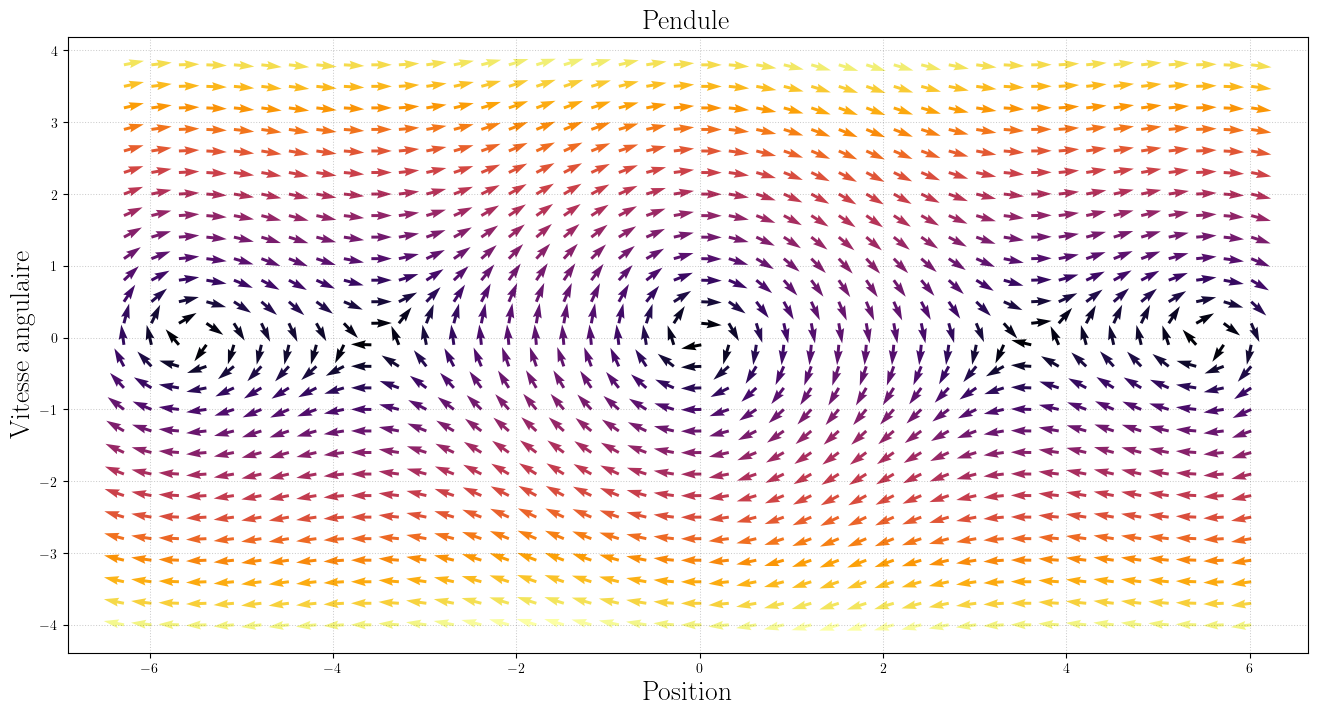

In [ ]:
f1 = lambda x, y : y
f2 = lambda x, y : -num.sin(x) - 0.12*x

fig, axes = subplots(figsize=(16, 8))
grid(color = 'black', linestyle = ':', linewidth = 0.75, alpha=0.2)
xlabel("Position", size=20)
ylabel("Vitesse angulaire", size=20)
title("Pendule", size=20)

plotVectorfield(f1, f2, (-2*num.pi, 2*num.pi, .3), (-4, 4, .3))
#plotFunction(f1, (0, 30, 0.1))
#plotFunction(f2, (0, 30, 0.1))

show()